In [1]:
import pandas as pd
import numpy as np

# Data Ingestion

In [2]:
from pyspark.sql import SparkSession

In [3]:
import pyspark
pyspark.__version__

'3.5.1'

In [4]:
spark = SparkSession.builder \
    .appName("ReservePricePrediction") \
    .config("spark.hadoop.fs.s3a.aws.credentials.provider", "com.amazonaws.auth.DefaultAWSCredentialsProviderChain") \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.3.1") \
    .getOrCreate()

25/05/28 22:20:34 WARN Utils: Your hostname, Harshs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.208 instead (on interface en0)
25/05/28 22:20:34 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /Users/harshbhatt/.ivy2/cache
The jars for the packages stored in: /Users/harshbhatt/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-9ee195a8-9673-4198-a586-2e2e58dcb8f2;1.0
	confs: [default]


:: loading settings :: url = jar:file:/Users/harshbhatt/anaconda3/lib/python3.11/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found org.apache.hadoop#hadoop-aws;3.3.1 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.901 in central
	found org.wildfly.openssl#wildfly-openssl;1.0.7.Final in central
:: resolution report :: resolve 162ms :: artifacts dl 3ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.11.901 from central in [default]
	org.apache.hadoop#hadoop-aws;3.3.1 from central in [default]
	org.wildfly.openssl#wildfly-openssl;1.0.7.Final from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   3   |   0   |   0   |   0   ||   3   |   0   |
	---------------------------------------------------------------------
:: retrieving :: org.apache.spark#spark-submit-parent-9ee195a8-9673-4198-a586-2e2e58dcb8f2
	confs: [default]


In [5]:
# s3 = boto3.client('s3')
# bucket = "reserve-price-prediction"
# key = "rawdata/Dataset.csv"

df = spark.read.csv(f"s3a://reserve-price-prediction/rawdata/Dataset.csv", header = True, inferSchema=True)

25/05/28 22:20:37 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
25/05/28 22:20:37 WARN BasicProfileConfigLoader: Your profile name includes a 'profile ' prefix. This is considered part of the profile name in the Java SDK, so you will need to include this prefix in your profile name when you reference this profile from your Java code.
25/05/28 22:20:37 WARN BasicProfileConfigLoader: Your profile name includes a 'profile ' prefix. This is considered part of the profile name in the Java SDK, so you will need to include this prefix in your profile name when you reference this profile from your Java code.
25/05/28 22:20:37 WARN BasicProfileConfigLoader: Your profile name includes a 'profile ' prefix. This is considered part of the profile name in the Java SDK, so you will need to include this prefix in your profile name when you reference this profile from your Java code.


In [6]:
print(df.count(), len(df.columns))

567291 17


In [7]:
df.columns

['date',
 'site_id',
 'ad_type_id',
 'geo_id',
 'device_category_id',
 'advertiser_id',
 'order_id',
 'line_item_type_id',
 'os_id',
 'integration_type_id',
 'monetization_channel_id',
 'ad_unit_id',
 'total_impressions',
 'total_revenue',
 'viewable_impressions',
 'measurable_impressions',
 'revenue_share_percent']

# EDA

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd_df = pd.read_csv("Dataset.csv")
pd_df.shape

(567291, 17)

In [10]:
pd_df.describe()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0
mean,347.107775,10.220578,110.226133,1.899669,262.084295,1951.273747,12.632081,57.217194,1.0,14.433716,5136.436645,33.673674,0.069740,12.838251,32.152818,1.0
std,2.930371,1.222863,66.177820,0.791982,627.325490,1652.545702,6.812571,1.956012,0.0,7.135874,62.508575,220.865448,0.713603,101.989184,207.096504,0.0
min,342.000000,10.000000,1.000000,1.000000,8.000000,45.000000,3.000000,15.000000,1.0,1.000000,5050.000000,0.000000,-0.154200,0.000000,0.000000,1.0
25%,345.000000,10.000000,39.000000,1.000000,79.000000,45.000000,4.000000,56.000000,1.0,4.000000,5099.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,346.000000,10.000000,122.000000,2.000000,88.000000,3438.000000,11.000000,57.000000,1.0,19.000000,5127.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,350.000000,10.000000,183.000000,3.000000,139.000000,3460.000000,19.000000,58.000000,1.0,19.000000,5168.000000,6.000000,0.005400,2.000000,6.000000,1.0
max,351.000000,17.000000,308.000000,5.000000,2646.000000,3489.000000,20.000000,60.000000,1.0,21.000000,5443.000000,14452.000000,83.822000,7392.000000,13756.000000,1.0


In [11]:
pd_df.columns

Index(['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'integration_type_id', 'monetization_channel_id', 'ad_unit_id',
       'total_impressions', 'total_revenue', 'viewable_impressions',
       'measurable_impressions', 'revenue_share_percent'],
      dtype='object')

In [12]:
pd_df.dtypes

date                        object
site_id                      int64
ad_type_id                   int64
geo_id                       int64
device_category_id           int64
advertiser_id                int64
order_id                     int64
line_item_type_id            int64
os_id                        int64
integration_type_id          int64
monetization_channel_id      int64
ad_unit_id                   int64
total_impressions            int64
total_revenue              float64
viewable_impressions         int64
measurable_impressions       int64
revenue_share_percent        int64
dtype: object

In [13]:
pd_df["date"] = pd.to_datetime(pd_df["date"])

In [14]:
for c in pd_df.columns:
    print(f"{c}: {len(pd_df[c].unique())}")

date: 30
site_id: 10
ad_type_id: 2
geo_id: 219
device_category_id: 5
advertiser_id: 23
order_id: 75
line_item_type_id: 7
os_id: 7
integration_type_id: 1
monetization_channel_id: 5
ad_unit_id: 132
total_impressions: 1979
total_revenue: 10099
viewable_impressions: 1159
measurable_impressions: 1884
revenue_share_percent: 1


Drop "revenue_share_percent" and "integration_type_id"

In [15]:
pd_df.drop(columns = ["revenue_share_percent", "integration_type_id"], inplace = True)

### Categorical columns

In [16]:
categorical_cols = []

for c in pd_df.columns:
    if "_id" in c:
        categorical_cols.append(c)

In [17]:
print(categorical_cols)

['site_id', 'ad_type_id', 'geo_id', 'device_category_id', 'advertiser_id', 'order_id', 'line_item_type_id', 'os_id', 'monetization_channel_id', 'ad_unit_id']


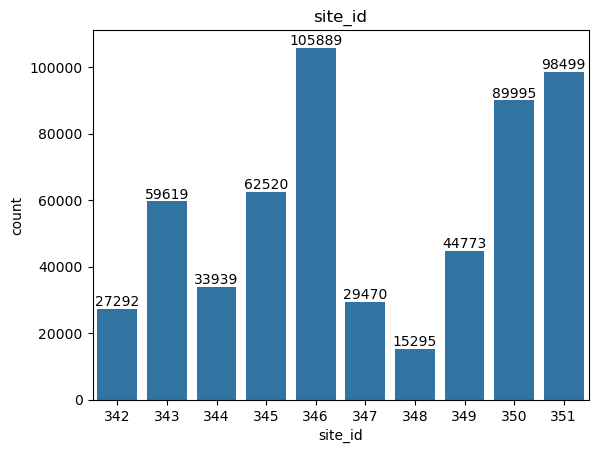

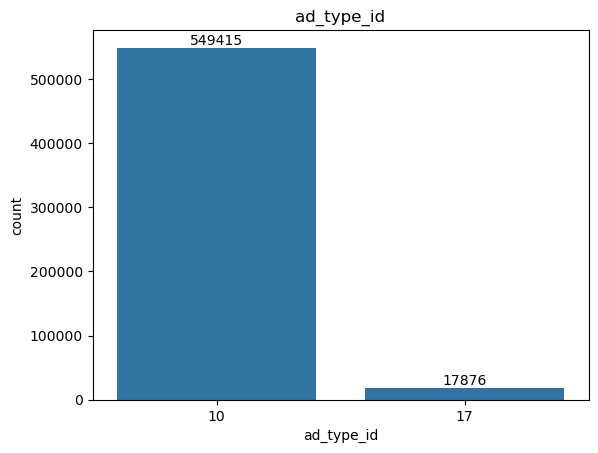

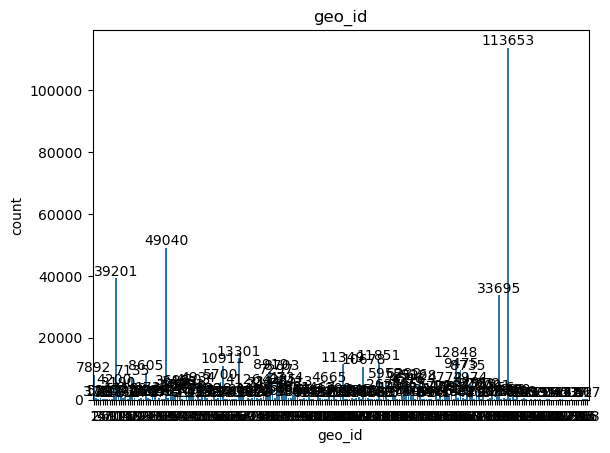

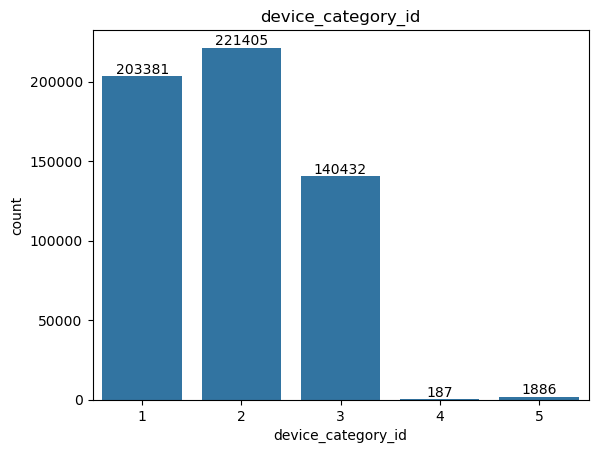

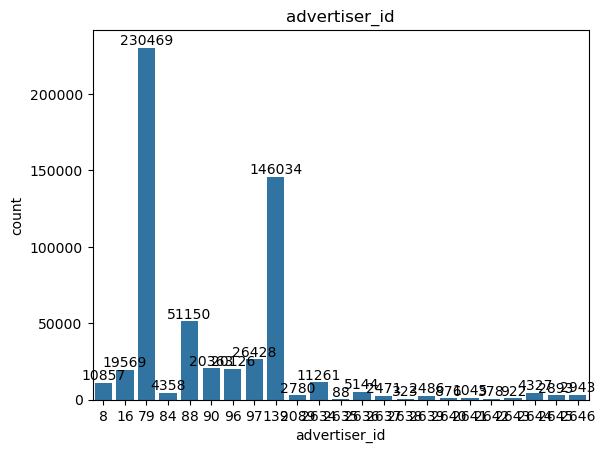

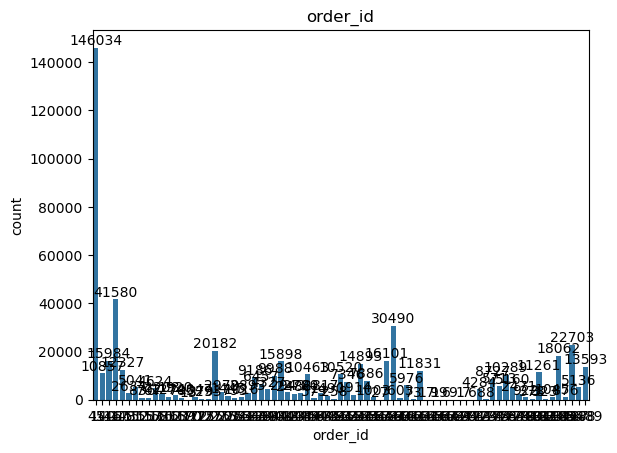

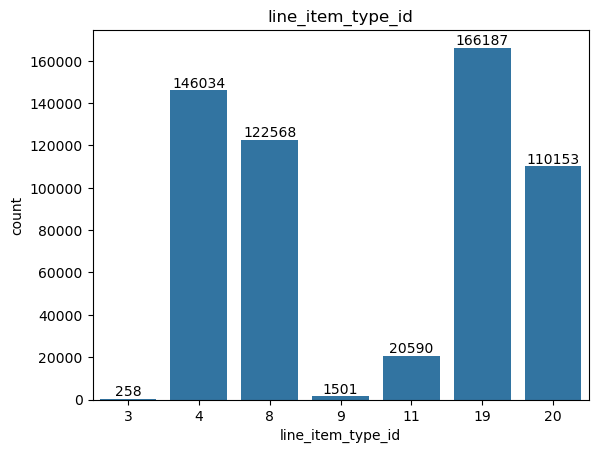

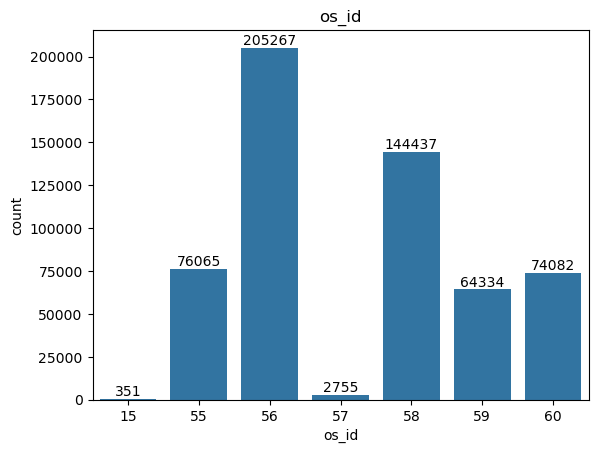

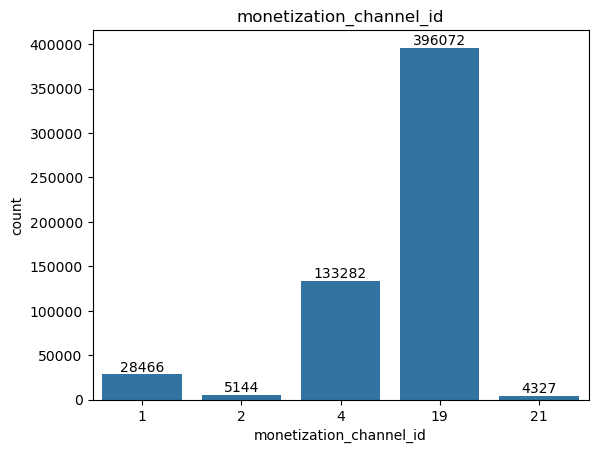

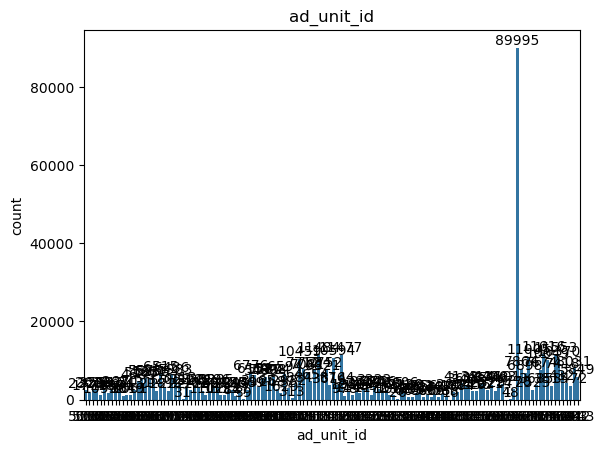

In [18]:
for c in categorical_cols:
    ax = sns.countplot(data = pd_df, x = c)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

### High cardinality categorical columns

In [19]:
high_card_cat_cols = ["geo_id", "ad_unit_id", "order_id", "advertiser_id"]

In [20]:
count_dfs = {}
for c in high_card_cat_cols:
    temp_df = pd.DataFrame(pd_df[c].value_counts()).reset_index()
    temp_df["pct"] = np.round(temp_df["count"] * 100 / sum(temp_df["count"]), 2)
    temp_df["agg_pct"] = temp_df["pct"].cumsum()
    count_dfs[c] = temp_df

#### geo_id

In [21]:
temp = list(count_dfs.values())[0]
temp[temp["pct"] > 1]

,geo_id,count,pct,agg_pct
0,187,113653,20.03,20.03
1,33,49040,8.64,28.67
2,11,39201,6.91,35.58
3,183,33695,5.94,41.52
4,66,13301,2.34,43.86
5,163,12848,2.26,46.12
6,129,11851,2.09,48.21
7,113,11349,2.00,50.21
8,59,10911,1.92,52.13
9,122,10678,1.88,54.01


Use frequency encoding

#### Ad unit id

In [22]:
temp = list(count_dfs.values())[1]
temp[temp["pct"] > 1]

,ad_unit_id,count,pct,agg_pct
0,5168,89995,15.86,15.86
1,5175,11616,2.05,17.91
2,5178,11553,2.04,19.95
3,5114,11484,2.02,21.97
4,5120,11477,2.02,23.99
5,5171,11005,1.94,25.93
6,5118,10594,1.87,27.80
7,5109,10459,1.84,29.64
8,5179,10370,1.83,31.47
9,5176,10049,1.77,33.24


Use frequency encoding

#### Order id

In [23]:
temp = list(count_dfs.values())[2]
temp[temp["pct"] > 1]

,order_id,count,pct,agg_pct
0,45,146034,25.74,25.74
1,147,41580,7.33,33.07
2,3460,30490,5.37,38.44
3,3487,22703,4.00,42.44
4,2750,20182,3.56,46.00
5,3485,18062,3.18,49.18
6,3459,16101,2.84,52.02
7,146,15984,2.82,54.84
8,3442,15898,2.80,57.64
9,3455,14893,2.63,60.27


Use frequency encoding

#### Advertiser id

In [24]:
temp = list(count_dfs.values())[3]
temp[temp["pct"] > 0.5]

,advertiser_id,count,pct,agg_pct
0,79,230469,40.63,40.63
1,139,146034,25.74,66.37
2,88,51150,9.02,75.39
3,97,26428,4.66,80.05
4,90,20363,3.59,83.64
5,96,20126,3.55,87.19
6,16,19569,3.45,90.64
7,2634,11261,1.99,92.63
8,8,10857,1.91,94.54
9,2636,5144,0.91,95.45


Use one hot encoding, with ids less than 0.5 grouped as one

### Continuous columns

In [25]:
numeric_cols = []

for c in pd_df.columns:
    if (c not in categorical_cols) and (c != "date"):
        numeric_cols.append(c)

In [26]:
numeric_cols

['total_impressions',
 'total_revenue',
 'viewable_impressions',
 'measurable_impressions']

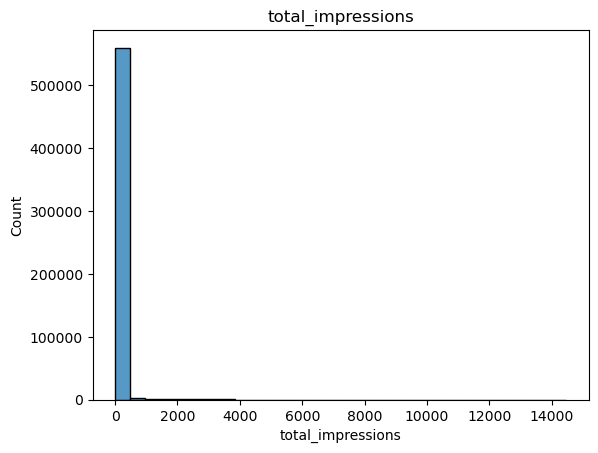

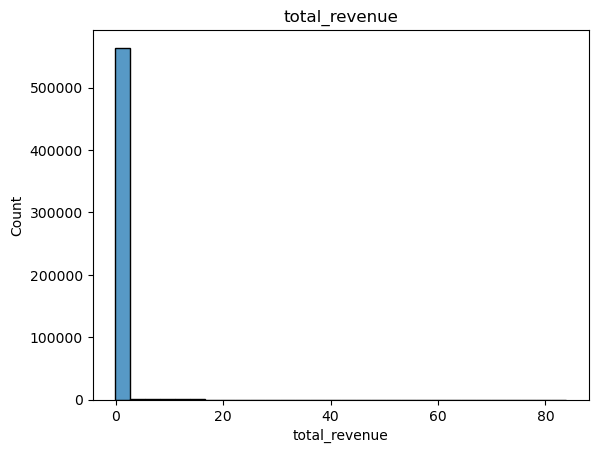

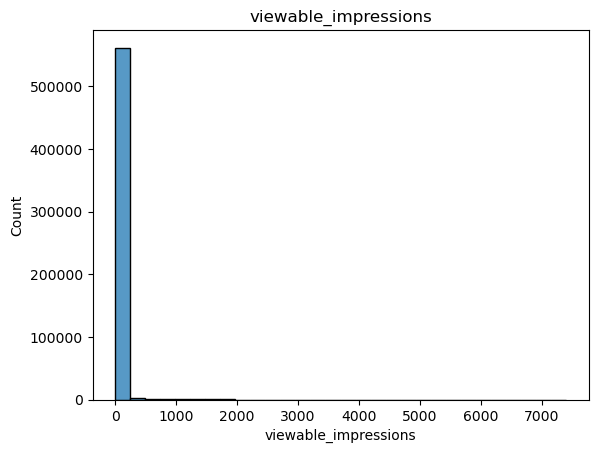

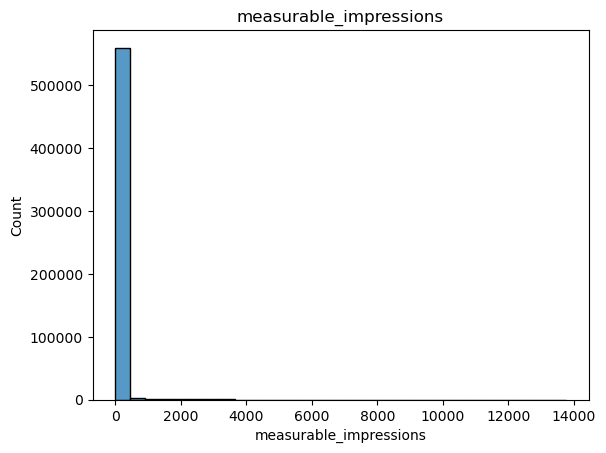

In [27]:
for c in numeric_cols:
    sns.histplot(data = pd_df, x = c, bins = 30)
    plt.title(c)
    plt.show()

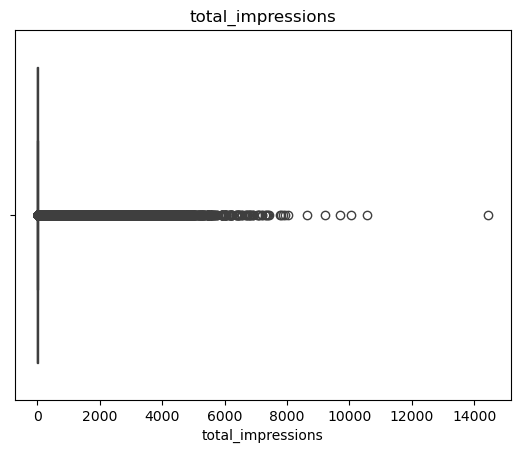

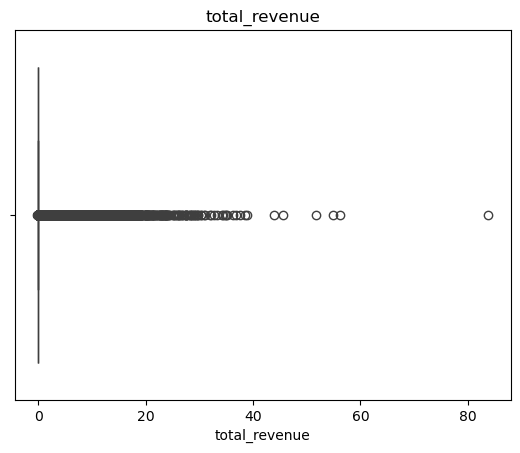

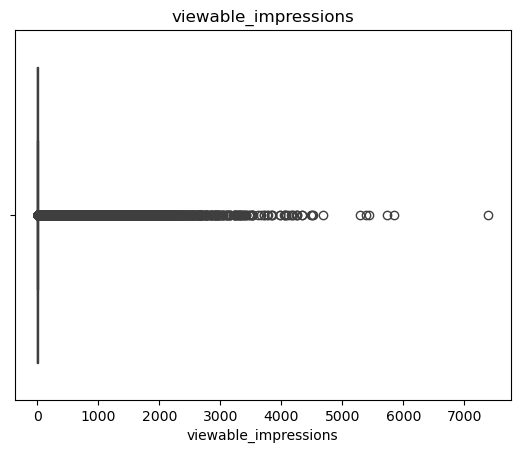

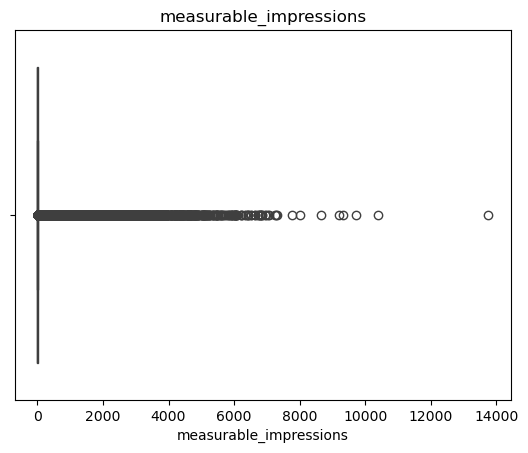

In [28]:
for c in numeric_cols:
    sns.boxplot(data=pd_df, x = c)
    plt.title(c)
    plt.show()

### Correlation

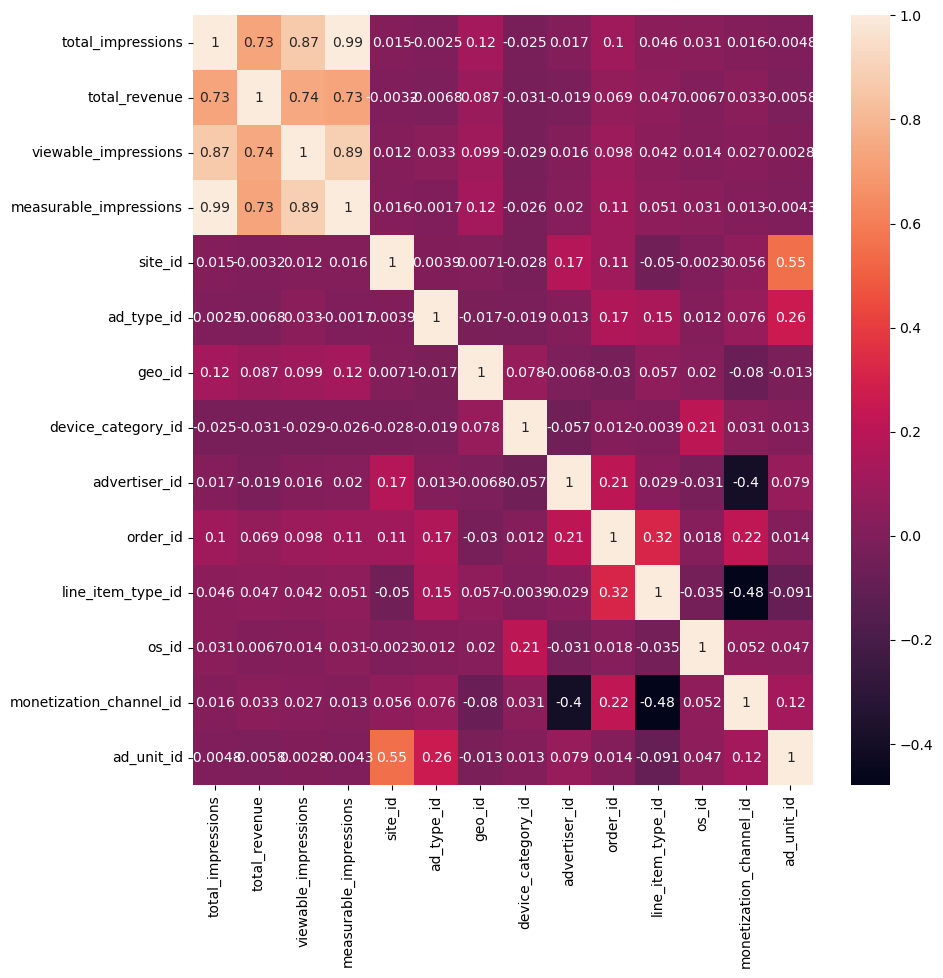

In [29]:
corr = pd_df[numeric_cols + categorical_cols].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()

Drop "total impressions, viewable impressions". Use "total_revenue" and "measurable_impressions" to get CPM and then drop "total_revenue"

### CPM

In [30]:
pd_df["CPM"] = (pd_df["total_revenue"] * 100 / pd_df["measurable_impressions"]) / 1000

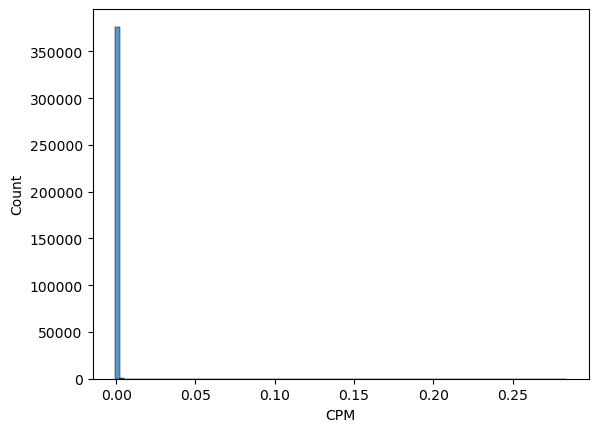

In [31]:
sns.histplot(data = pd_df, x = "CPM", bins = 100)
plt.show()

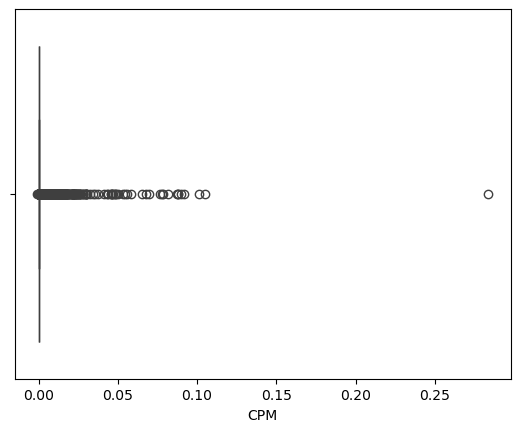

In [32]:
sns.boxplot(data = pd_df, x = "CPM")
plt.show()

In [33]:
cpm_notna = pd_df[pd_df["CPM"] >= 0]
cpm_pct = cpm_notna[cpm_notna["CPM"] < cpm_notna["CPM"].quantile(0.95)]
len(cpm_pct) / len(cpm_notna)

0.9499071717441913

Remove rows with CPM > 0.95 quantile

# Feature Engineering

In [34]:
import pyspark.sql.functions as F
from pyspark.sql.functions import col
from itertools import chain

In [35]:
unq_counts = {}
for c in df.columns:
    count = df.select(c).distinct().count()
    unq_counts[c] = count

In [36]:
unq_counts

{'date': 30,
 'site_id': 10,
 'ad_type_id': 2,
 'geo_id': 219,
 'device_category_id': 5,
 'advertiser_id': 23,
 'order_id': 75,
 'line_item_type_id': 7,
 'os_id': 7,
 'integration_type_id': 1,
 'monetization_channel_id': 5,
 'ad_unit_id': 132,
 'total_impressions': 1979,
 'total_revenue': 10099,
 'viewable_impressions': 1159,
 'measurable_impressions': 1884,
 'revenue_share_percent': 1}

In [37]:
drop_cols = [c for c,v in unq_counts.items() if v == 1]
cat_cols = [c for c,v in unq_counts.items() if "_id" in c and c not in drop_cols]
high_card_cat_cols = [c for c,v in unq_counts.items() if c in cat_cols and v > 15]
low_card_cat_cols = [c for c in cat_cols if c not in high_card_cat_cols]
num_cols = [c for c,v in unq_counts.items() if c not in drop_cols and c not in cat_cols and c != "date"]

print(f"Columns to drop: {drop_cols}\nLow Cardinatlity Categorical columns: {low_card_cat_cols}\nHigh Cardinatlity Categorical columns: {high_card_cat_cols}\nNumerical columns: {num_cols}")

Columns to drop: ['integration_type_id', 'revenue_share_percent']
Low Cardinatlity Categorical columns: ['site_id', 'ad_type_id', 'device_category_id', 'line_item_type_id', 'os_id', 'monetization_channel_id']
High Cardinatlity Categorical columns: ['geo_id', 'advertiser_id', 'order_id', 'ad_unit_id']
Numerical columns: ['total_impressions', 'total_revenue', 'viewable_impressions', 'measurable_impressions']


### Null checks

In [38]:
null_counts = df.select([F.sum(F.col(c).isNull().cast('int')).alias(c) for c in df.columns]).rdd.collect()
null_dict = [row.asDict() for row in null_counts][0]
print(null_dict)

{'date': 0, 'site_id': 0, 'ad_type_id': 0, 'geo_id': 0, 'device_category_id': 0, 'advertiser_id': 0, 'order_id': 0, 'line_item_type_id': 0, 'os_id': 0, 'integration_type_id': 0, 'monetization_channel_id': 0, 'ad_unit_id': 0, 'total_impressions': 0, 'total_revenue': 0, 'viewable_impressions': 0, 'measurable_impressions': 0, 'revenue_share_percent': 0}


In [39]:
null_cols = []
for col,null_vals in null_dict.items():
    if null_vals > 0:
        null_cols.append(col)

In [40]:
if null_cols:
    print("Filling missing values in columns:")
    for col in null_cols:
        print(col)
        if col in numeric_cols:
            df = df.na.fill({col: 0})
        elif col in cat_cols:
            df = df.na.fill({col: "Unknown"})

### Drop columns

In [41]:
for c in drop_cols:
    df = df.drop(c)

### CPM column

In [42]:
def divide(n, d):
    if d:
        return n / d 
    return 0

divide_udf = F.udf(divide)

CPM = (Publisher Revenue / Impressions) * 1000

CPM = ((Total Revenue / Revenue Share of Publisher) / Impressions) * 1000

In this dataset, all revenue share are 100% for the publisher, hence we can omit that division

In [43]:
df = df.withColumn("CPM", divide_udf(df["total_revenue"] * 100, df["measurable_impressions"]) * 1000)

In [44]:
quantile_threshold = df.approxQuantile("CPM", [0.95], 0.01)[0]
quantile_threshold

482.00000000000006

In [45]:
print(f"Rows before dropping CPM outilers: {df.count()}")

Rows before dropping CPM outilers: 567291


In [46]:
df = df.filter(df["CPM"] <= quantile_threshold)

In [47]:
print(f"Rows after dropping CPM outilers: {df.count()}")

Rows after dropping CPM outilers: 534936


### Viewable to Measureable ratio

In [48]:
df = df.withColumn("v/m ratio", divide_udf(df["viewable_impressions"], df["measurable_impressions"]))

In [49]:
num_cols = [c for c in num_cols if c not in ["total_revenue", "total_impressions", "viewable_impressions"]]
num_cols

['measurable_impressions']

### Frequency encode columns - geo_id, ad_unit_id, order_id 

In [50]:
geo_aggregated = df.groupBy(F.col("geo_id")).agg(F.count("*").alias("Count")).collect()
geo_list = [row.asDict() for row in geo_aggregated]

geo_dict = {}
for row in geo_list:
    geo_dict[row["geo_id"]] = row["Count"]

In [51]:
adunit_aggregated = df.groupBy(F.col("ad_unit_id")).agg(F.count("*").alias("Count")).collect()
adunit_list = [row.asDict() for row in adunit_aggregated]

adunit_dict = {}
for row in adunit_list:
    adunit_dict[row["ad_unit_id"]] = row["Count"]

In [52]:
order_aggregated = df.groupBy(F.col("order_id")).agg(F.count("*").alias("Count")).collect()
order_list = [row.asDict() for row in order_aggregated]

order_dict = {}
for row in order_list:
    order_dict[row["order_id"]] = row["Count"]

In [53]:
geo_mapper = F.create_map([F.lit(x) for x in chain(*geo_dict.items())])
order_mapper = F.create_map([F.lit(x) for x in chain(*order_dict.items())])
adunit_mapper = F.create_map([F.lit(x) for x in chain(*adunit_dict.items())])

In [54]:
df = (df
      .withColumn("geo_id", geo_mapper[F.col("geo_id")])
      .withColumn("ad_unit_id", adunit_mapper[F.col("ad_unit_id")])
      .withColumn("order_id", order_mapper[F.col("order_id")])
      )

### One-Hot encoding

#### Prep advertiser_id for one-hot encoding

In [55]:
adv_id_grouped = df.groupBy(F.col("advertiser_id")).agg(F.count("*").alias("count"))
total_vals = adv_id_grouped.select(F.sum("count")).collect()[0][0]
adv_id_grouped = adv_id_grouped.withColumn("pct", F.round(adv_id_grouped["count"] * 100/ total_vals, 2))
adv_id_grouped = adv_id_grouped.filter(F.col("pct") > 1)
adv_id_grouped.show()
# total_vals

+-------------+------+-----+
|advertiser_id| count|  pct|
+-------------+------+-----+
|           16| 18218| 3.41|
|          139|145913|27.28|
|           96| 16830| 3.15|
|           88| 42920| 8.02|
|            8| 10350| 1.93|
|           97| 20978| 3.92|
|           90| 13521| 2.53|
|         2634| 11261| 2.11|
|           79|223911|41.86|
+-------------+------+-----+



In [56]:
freq_advertisers = adv_id_grouped.select(F.col("advertiser_id")).rdd.flatMap(lambda x:x).collect()
freq_advertisers

[16, 139, 96, 88, 8, 97, 90, 2634, 79]

In [57]:
def get_advertiser(x):
    if x in freq_advertisers:
        return x
    return 0

get_advertiser_udf = F.udf(get_advertiser)

In [58]:
df = df.withColumn("advertiser_id", get_advertiser_udf(F.col("advertiser_id")))

#### One-Hot encode

In [59]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

In [60]:
oh_columns = low_card_cat_cols + ["advertiser_id"]
oh_columns

['site_id',
 'ad_type_id',
 'device_category_id',
 'line_item_type_id',
 'os_id',
 'monetization_channel_id',
 'advertiser_id']

In [61]:
indexers = [StringIndexer(inputCol=col, outputCol=col+"_idx", handleInvalid="keep") for col in oh_columns]

In [62]:
encoder = OneHotEncoder(inputCols=[col+"_idx" for col in oh_columns], outputCols=[col+"_ohe" for col in oh_columns])

In [63]:
oh_pipeline = Pipeline(stages = indexers + [encoder])
df_encoded = oh_pipeline.fit(df).transform(df)

### Scale numerical features

In [64]:
from pyspark.ml.feature import VectorAssembler, MinMaxScaler, StandardScaler

In [65]:
minmax_cols = [c for c in high_card_cat_cols if c not in oh_columns]
minmax_cols

['geo_id', 'order_id', 'ad_unit_id']

In [66]:
minmax_assembler = VectorAssembler(inputCols=minmax_cols, outputCol = "minmax_features_vec")
minmax_scaler = MinMaxScaler(inputCol="minmax_features_vec", outputCol="minmax_features")

In [67]:
minmax_pipeline = Pipeline(stages=[minmax_assembler, minmax_scaler])
df_scaled = minmax_pipeline.fit(df_encoded).transform(df_encoded)

In [68]:
stdscalar_assembler = VectorAssembler(inputCols=num_cols, outputCol="stdscaler_features_vec")
std_scaler = StandardScaler(inputCol="stdscaler_features_vec", outputCol="stdscaler_features")

In [69]:
stdscaler_pipeline = Pipeline(stages=[stdscalar_assembler,std_scaler])
df_scaled = stdscaler_pipeline.fit(df_scaled).transform(df_scaled)

In [70]:
target_scalar_assembler = VectorAssembler(inputCols=["CPM"], outputCol="target_features_vec")
target_scaler = StandardScaler(inputCol="target_features_vec", outputCol="target_scaler_features")

In [71]:
target_scalar_pipeline = Pipeline(stages = [target_scalar_assembler, target_scaler])
df_transformed = target_scalar_pipeline.fit(df_scaled).transform(df_scaled)

## Final assembler

In [72]:
all_feature_cols = [col+"_ohe" for col in oh_columns] + ["minmax_features", "stdscaler_features"]

In [73]:
assembler = VectorAssembler(inputCols=all_feature_cols, outputCol="features")
df_final = assembler.transform(df_transformed)

In [74]:
df_final = df_final.sort(F.col("date").asc())

In [75]:
df_final.show()

25/05/28 22:22:14 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-----------------------+----------+-----------------+-------------+--------------------+----------------------+------------------+------------------+-----------+--------------+----------------------+---------------------+---------+---------------------------+-----------------+--------------+--------------+----------------------+---------------------+-------------+---------------------------+-----------------+--------------------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+
|               date|site_id|ad_type_id|geo_id|device_category_id|advertiser_id|order_id|line_item_type_id|os_id|monetization_channel_id|ad_unit_id|total_impressions|total_revenue|viewable_impressions|measurable_impressions|               CPM|         v/m ratio|site_id_idx|ad_type_id_idx|device_category_id_idx|line_item_t

# Training

In [76]:
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error

In [77]:
train_df = df_final.filter(F.col("date") < "2019-06-23")
test_df = df_final.filter(F.col("date") >= "2019-06-23")

In [78]:
X_train = np.array(train_df.select("features").rdd.map(lambda x: x[0].toArray()).collect())
y_train = np.array(train_df.select(["target_scaler_features"]).rdd.map(lambda x: x[0]).collect())

In [79]:
X_test = np.array(test_df.select("features").rdd.map(lambda x: x[0].toArray()).collect())
y_test = np.array(test_df.select(["target_scaler_features"]).rdd.map(lambda x: x[0]).collect())

In [80]:
def train_model(**kwargs):
    parameters = {}
    for key, val in kwargs.items():
        parameters[key] = val

    xg = xgb.XGBRegressor(**kwargs)
    xg.fit(X_train, y_train)
    return xg, parameters

In [81]:
model, parameters = train_model(n_estimators = 100, max_depth = 3)

In [82]:
y_pred = model.predict(X_test)

In [83]:
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

0.574688999115398


# Experiment Logging

In [84]:
import wandb
import joblib
from datetime import datetime
import os
import json
import numpy as np
import pandas as pd

In [ ]:
os.environ['WANDB_API_KEY'] = 'set-key'

In [86]:
wandb.login()

wandb: Currently logged in as: bhatt-hars (bhatt-hars-northeastern-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [87]:
def get_timestamp():
    date = "_".join(str(datetime.now().date()).split("-"))
    time = "_".join(str(datetime.now().time())[:8].split(":"))
    timestamp = date + "_" + time

    return timestamp

In [88]:
def logger(model, parameters, y_pred, y_test, return_model_path = True):
    base_path = f"artifacts/model_{get_timestamp()}"
    os.mkdir(base_path)
    
    model_path = f"{base_path}/model.joblib"
    joblib.dump(model, model_path)
    print(f"Model saved to {model_path}")

    parameters_path = f"{base_path}/parameters.json"
    rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
    parameters["RMSE"] = rmse
    with open(parameters_path, "w") as f:
        json.dump(parameters, f)
    print(f"Parameters saved to {parameters_path}")

    predictions_path = f"{base_path}/predictions.csv"
    predictions_df = pd.DataFrame({"Actual": y_test.reshape(-1), "Predictions": y_pred})
    predictions_df.to_csv(predictions_path, index = False)
    print(f"Predictions saved to {predictions_path}")

    if return_model_path:
        return model_path

In [89]:
model, parameters = train_model(n_estimators = 100, max_depth = 3)

In [90]:
# logger(model = model, parameters = parameters, y_pred=y_pred, y_test=y_test)

In [91]:
def save_to_wandb(model_path, parameters):
    run = wandb.init(project = "reserve_price_prediction")

    artifact = wandb.Artifact("xgbregressor_model", type = "model")
    artifact.add_file(model_path)
    run.log_artifact(artifact)
    print("Model logged to WandB succesfully")

    for k,v in parameters.items():
        run.log({k:v})
        print(f"{k} logged to WandB")
    print("All parameters logged succesfully")

    run.finish()

In [92]:
model_path = logger(model = model, parameters= parameters, y_pred = y_pred, y_test = y_test)

Model saved to artifacts/model_2025_05_28_22_22_52/model.joblib
Parameters saved to artifacts/model_2025_05_28_22_22_52/parameters.json
Predictions saved to artifacts/model_2025_05_28_22_22_52/predictions.csv


In [93]:
# save_to_wandb(model_path = model_path, parameters = parameters)

# Inverse transform predictions

In [94]:
target_mean = df_final.select(F.mean(F.col("CPM"))).collect()[0][0]
target_std = df_final.select(F.std(F.col("CPM"))).collect()[0][0]

In [95]:
target_mean, target_std

(53.925974562629854, 94.9079021513758)

In [96]:
df_final.columns

['date',
 'site_id',
 'ad_type_id',
 'geo_id',
 'device_category_id',
 'advertiser_id',
 'order_id',
 'line_item_type_id',
 'os_id',
 'monetization_channel_id',
 'ad_unit_id',
 'total_impressions',
 'total_revenue',
 'viewable_impressions',
 'measurable_impressions',
 'CPM',
 'v/m ratio',
 'site_id_idx',
 'ad_type_id_idx',
 'device_category_id_idx',
 'line_item_type_id_idx',
 'os_id_idx',
 'monetization_channel_id_idx',
 'advertiser_id_idx',
 'site_id_ohe',
 'ad_type_id_ohe',
 'device_category_id_ohe',
 'line_item_type_id_ohe',
 'os_id_ohe',
 'monetization_channel_id_ohe',
 'advertiser_id_ohe',
 'minmax_features_vec',
 'minmax_features',
 'stdscaler_features_vec',
 'stdscaler_features',
 'target_features_vec',
 'target_scaler_features',
 'features']

In [97]:
predictions_inv = y_pred * target_std + target_mean
predictions_inv.shape

(142661,)

In [98]:
y_test.shape

(142661, 1)

In [99]:
y_test

array([[1.05365304],
       [0.        ],
       [0.        ],
       ...,
       [2.12047675],
       [3.15252991],
       [2.10730609]])

In [152]:
from pyspark.sql.window import Window
from pyspark.sql.types import IntegerType, FloatType, ArrayType
from pyspark.ml.functions import vector_to_array

In [124]:
pred_df = spark.createDataFrame(data = predictions_inv, schema = ["Predictions"])
pred_df = pred_df.withColumn("num_id", F.row_number().over(Window.orderBy(F.monotonically_increasing_id())))
pred_df.show()

25/05/28 22:38:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 22:38:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 22:38:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+------------------+------+
|       Predictions|num_id|
+------------------+------+
| 175.9163055419922|     1|
| 57.06251525878906|     2|
| 64.29966735839844|     3|
|  58.3065071105957|     4|
| 63.81734085083008|     5|
|53.670074462890625|     6|
|54.053916931152344|     7|
| 75.35547637939453|     8|
|61.062652587890625|     9|
| 78.42271423339844|    10|
|114.17317199707031|    11|
| 57.26627731323242|    12|
| 53.49530029296875|    13|
| 65.79484558105469|    14|
| 79.40558624267578|    15|
| 48.67321014404297|    16|
|55.412559509277344|    17|
| 66.16455841064453|    18|
| 55.58438491821289|    19|
| 66.16455841064453|    20|
+------------------+------+
only showing top 20 rows



In [ ]:
temp = test_df.select("*")
temp = temp.withColumn("num_id", F.row_number().over(Window.orderBy(F.monotonically_increasing_id())))
temp = temp.withColumn("target_unscaled", vector_to_array("target_scaler_features"))

In [194]:
merged = temp.join(pred_df, on = "num_id", how = "inner")
merged.show()

25/05/28 23:14:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:14:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:14:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:14:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:14:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:14:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 2

+------+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-----------------------+----------+-----------------+-------------+--------------------+----------------------+-----+------------------+-----------+--------------+----------------------+---------------------+---------+---------------------------+-----------------+--------------+--------------+----------------------+---------------------+-------------+---------------------------+-----------------+--------------------+--------------------+----------------------+--------------------+-------------------+----------------------+--------------------+------------------+------------------+
|num_id|               date|site_id|ad_type_id|geo_id|device_category_id|advertiser_id|order_id|line_item_type_id|os_id|monetization_channel_id|ad_unit_id|total_impressions|total_revenue|viewable_impressions|measurable_impressions|  CPM|         v/m ratio|site_id_idx|ad_type_id_idx|device_ca

In [199]:
drop_columns = [c for c in temp.columns if c not in df.columns]
# drop_columns.remove("Predictions")
final_df = merged.drop(*drop_columns)
final_df.columns

['date',
 'site_id',
 'ad_type_id',
 'geo_id',
 'device_category_id',
 'advertiser_id',
 'order_id',
 'line_item_type_id',
 'os_id',
 'monetization_channel_id',
 'ad_unit_id',
 'total_impressions',
 'total_revenue',
 'viewable_impressions',
 'measurable_impressions',
 'CPM',
 'v/m ratio',
 'Predictions']

In [200]:
final_df.count()
final_df.show()

25/05/28 23:30:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 2

+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-----------------------+----------+-----------------+-------------+--------------------+----------------------+-----+------------------+------------------+
|               date|site_id|ad_type_id|geo_id|device_category_id|advertiser_id|order_id|line_item_type_id|os_id|monetization_channel_id|ad_unit_id|total_impressions|total_revenue|viewable_impressions|measurable_impressions|  CPM|         v/m ratio|       Predictions|
+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-----------------------+----------+-----------------+-------------+--------------------+----------------------+-----+------------------+------------------+
|2019-06-23 00:00:00|    347|        10| 92107|                 3|           96|   15983|               19|   55|                      4|      1955|                2|        0.002|             

25/05/28 23:30:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:30:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [201]:
geo_reverse_dict = {v:k for k,v in geo_dict.items()}
order_reverse_dict = {v:k for k,v in order_dict.items()}
adunit_reverse_dict = {v:k for k,v in adunit_dict.items()}

In [202]:
geo_reverse_mapper = F.create_map([F.lit(x) for x in chain(*geo_reverse_dict.items())])
order_reverse_mapper = F.create_map([F.lit(x) for x in chain(*order_reverse_dict.items())])
adunit_reverse_mapper = F.create_map([F.lit(x) for x in chain(*adunit_reverse_dict.items())])

In [203]:
last_df = (final_df
      .withColumn("geo_id", geo_reverse_mapper[F.col("geo_id")])
      .withColumn("ad_unit_id", adunit_reverse_mapper[F.col("ad_unit_id")])
      .withColumn("order_id", order_reverse_mapper[F.col("order_id")])
      )

In [204]:
last_df.count()
last_df.show()

25/05/28 23:37:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:37:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:37:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:37:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:37:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:37:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 2

+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-----------------------+----------+-----------------+-------------+--------------------+----------------------+-----+------------------+------------------+
|               date|site_id|ad_type_id|geo_id|device_category_id|advertiser_id|order_id|line_item_type_id|os_id|monetization_channel_id|ad_unit_id|total_impressions|total_revenue|viewable_impressions|measurable_impressions|  CPM|         v/m ratio|       Predictions|
+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-----------------------+----------+-----------------+-------------+--------------------+----------------------+-----+------------------+------------------+
|2019-06-23 00:00:00|    347|        10|   187|                 3|           96|     146|               19|   55|                      4|      5122|                2|        0.002|             

25/05/28 23:38:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:38:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:38:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/05/28 23:38:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


# Write artifacts and parquet to s3

In [215]:
import os
import boto3

In [223]:
artifacts_path = "/".join(list(model_path.split("/"))[:-1])
model_id = model_path.split("/")[1]
artifacts_path, model_id

('artifacts/model_2025_05_28_22_22_52', 'model_2025_05_28_22_22_52')

In [216]:
s3 = boto3.client("s3")

In [ ]:
def upload_to_s3(file_path, bucket_name, object_name):    
    try:
        s3.upload_file(file_path, bucket_name, object_name)
        print(f"Successfully uploaded {file_path} to s3://{bucket_name}/{object_name}")
    except Exception as e:
        print(f"Error uploading {file_path} to s3://{bucket_name}/{object_name}: {e}")

In [219]:
bucket = "reserve-price-prediction"

In [220]:
for file in os.listdir(artifacts_path):
    key = f"{artifacts_path}/{file}"
    upload_to_s3(file_path = key, bucket_name = bucket, object_name = key)

Successfully uploaded artifacts/model_2025_05_28_22_22_52/parameters.json to s3://reserve-price-prediction/artifacts/model_2025_05_28_22_22_52/parameters.json
Successfully uploaded artifacts/model_2025_05_28_22_22_52/predictions.csv to s3://reserve-price-prediction/artifacts/model_2025_05_28_22_22_52/predictions.csv
Successfully uploaded artifacts/model_2025_05_28_22_22_52/model.joblib to s3://reserve-price-prediction/artifacts/model_2025_05_28_22_22_52/model.joblib


In [225]:
def upload_as_parquet(object, bucket_name, object_path):
    try:
        object.write.mode("overwrite").parquet(f"s3a://{bucket_name}/{object_path}/")
        print(f"Successfully uploaded {object} to s3://{bucket_name}/{object_path}/")
    except Exception as e:
        print(f"Error uploading {object} to s3://{bucket_name}/{object_path}: {e}")

In [ ]:
upload_as_parquet(object = last_df, bucket_name = bucket, object_path = f"output_files/{model_id}")